<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

In [1]:
import matplotlib.pyplot as plt

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

### Load Data (5 Marks)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
df = pd.read_json('/content/drive/My Drive/Sarcasm Detection NLP/Sarcasm_Headlines_Dataset.json', lines = True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


### Drop `article_link` from dataset (5 Marks)

In [5]:
df.drop('article_link', axis = 1, inplace = True)

In [6]:
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [7]:
df['is_sarcastic'].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

**Detecting if text is multilingual:**
We'll import the lang_detect function . Our target is to find the no of distribution of diffrent languages in headline column

In [8]:
# importing required libraries
import warnings
warnings.filterwarnings('ignore')
import subprocess
import sys
print("installing langdetect python package...")
subprocess.check_call([sys.executable, "-m", "pip", "install", "langdetect"])
print("Done!")
from langdetect import detect

def lang_detect(text):
    """
    Detects language of the text. 
    If a language is detected, returns the ISO 639-1 language code, else "unknown"
    
    text: text to detect language (string)
    """
    try:                                                          
      return detect(text)                                      
    except:                                                       
      return 'unknown' 

installing langdetect python package...
Done!


In [9]:
print(lang_detect.__doc__)


    Detects language of the text. 
    If a language is detected, returns the ISO 639-1 language code, else "unknown"
    
    text: text to detect language (string)
    


In [10]:
def plot_count_plot(values, labels, xlabel="", ylabel="", title=''):
    """
    Plots a count plot. Width and height fixed at 20px and 7px respectively.
    
    values: pass count(integers) as an array/list/series
    labels: pass labels(string) corresponding to the count as an array/list
    xlabel: label for x-axis (string)
    ylabel: label for y-axis (string)
    title: title of the plot (string)
    """
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.bar(x=labels,height=values)
    plt.show()

In [11]:
df['Language'] = df["headline"].apply(lang_detect)

Count of descriptions per language



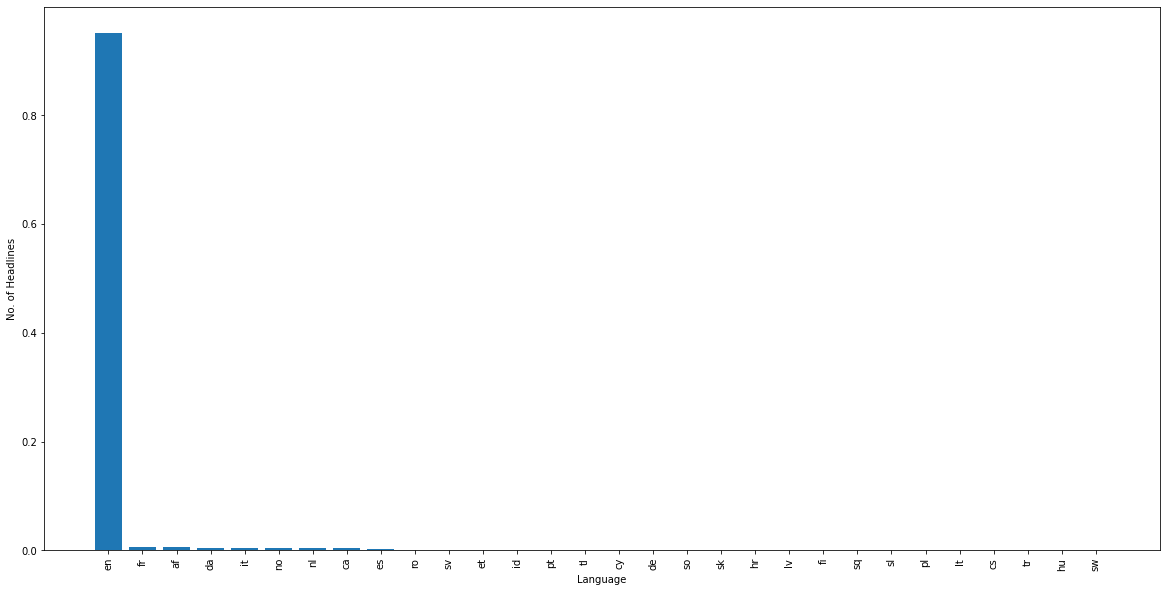

In [12]:
xlabel = "Language"
ylabel = "No. of Headlines"
values = df["Language"].value_counts(5).to_dict().values()
labels = df["Language"].value_counts(5).to_dict().keys()
print("Count of descriptions per language\n")
plot_count_plot(values,labels,xlabel,ylabel)

In [19]:
df["Language"].value_counts().head(5)

en    25424
fr      175
af      147
da      137
it      130
Name: Language, dtype: int64

So English is the most frequentlanguage in headline column followed by french and african 

### Get length of each headline and add a column for that (5 Marks)

In [ ]:
df= df.assign(lengthofHeadline = df['headline'].str.len())
df.head()


,headline,is_sarcastic,lengthofHeadline
0,former versace store clerk sues over secret 'b...,0,78
1,the 'roseanne' revival catches up to our thorn...,0,84
2,mom starting to fear son's web series closest ...,1,79
3,"boehner just wants wife to listen, not come up...",1,84
4,j.k. rowling wishes snape happy birthday in th...,0,64


In [ ]:
s = df.loc[0, 'headline']
len(s)

78

### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [ ]:
max_features = 10000
maxlen = 25
embedding_size = 200

### Apply `tensorflow.keras` Tokenizer and get indices for words (5 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [85]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk

In [86]:
nltk.download('stopwords')
from nltk.corpus import stopwords # Import stop words
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
from string import punctuation
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We do some preprocessing for the headline column 

I have used nltk.stopwords and other preprocessing in this notebook just for practice in real time datasets. If we use tokenizer then these preprocessing are done by default .

In [73]:
punctuations = list(punctuation)

In [96]:
def preprocess_func(text):
  word = text.split()
  word = [w.lower() for w in word if w not in punctuations]
  word = " ".join(word)
  word = re.sub(r"[^A-Za-z0-9]", " ", word)
  word = re.sub(r"\s{2,}", " ", word)
  """word = [lemmatizer.lemmatize(word) for word in word if word not in set(stopwords.words('english'))]
  word = [word.lower() for word in word if word not in stop]"""
  tokens = RegexpTokenizer('[A-Za-z0-9]+').tokenize(word) #converting to tokens
  tokens = pos_based_lematizer(tokens) #lematizing - custom lemmatizer function defined above
  tokens = [t for t in tokens if t not in stopwords] #removing stopwords
  cleaned_text = ' '.join(tokens)
  return cleaned_text
  


In [97]:
tokens = RegexpTokenizer('[A-Za-z0-9]+').tokenize(word) #converting to tokens
tokens = pos_based_lematizer(tokens) #lematizing - custom lemmatizer function defined above
tokens = [t for t in tokens if t not in stopwords] #removing stopwords
cleaned_text = ' '.join(tokens)
return cleaned_text

NameError: ignored

In [98]:
df['headline'] = df['headline'].apply(preprocess_func)


UnboundLocalError: ignored

In [ ]:
import nltk

In [ ]:
"""nltk.download('stopwords')
from nltk.corpus import stopwords # Import stop words
stop = stopwords.words('english')
#df['headline'] = [w for w in df['headline'].str.lower() if w not in stopwords.words('english')]"""

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
"""df['headline']=df['headline'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))"""

In [68]:
df['headline'].head()

0    None
1    None
2    None
3    None
4    None
Name: headline, dtype: object

In [ ]:
tokenizer = Tokenizer(num_words= max_features, split =' ' )
tokenizer.fit_on_texts(df['headline'].values)
X = tokenizer.texts_to_sequences(df['headline'].values)

### Pad sequences (5 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [ ]:
import numpy as np

In [ ]:
X= pad_sequences(X, maxlen=maxlen, dtype='int32', padding='pre', truncating='pre', value=0.0)

In [ ]:
y = np.array(df['is_sarcastic'])
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
y.shape

(26709,)

### Vocab mapping
- There is no word for 0th index

In [ ]:
tokenizer.word_index

{'new': 1,
 'trump': 2,
 'man': 3,
 'us': 4,
 'report': 5,
 'one': 6,
 'area': 7,
 'donald': 8,
 'says': 9,
 'woman': 10,
 'day': 11,
 'time': 12,
 'first': 13,
 'like': 14,
 'get': 15,
 'trumps': 16,
 'people': 17,
 'obama': 18,
 'house': 19,
 'life': 20,
 'make': 21,
 'still': 22,
 'women': 23,
 'white': 24,
 'back': 25,
 'clinton': 26,
 'world': 27,
 'years': 28,
 'could': 29,
 'family': 30,
 'americans': 31,
 'way': 32,
 'black': 33,
 'gop': 34,
 'study': 35,
 '5': 36,
 'bill': 37,
 'would': 38,
 'best': 39,
 'police': 40,
 'watch': 41,
 'really': 42,
 'american': 43,
 'show': 44,
 'school': 45,
 'cant': 46,
 'know': 47,
 'things': 48,
 'good': 49,
 'home': 50,
 'death': 51,
 'president': 52,
 'finds': 53,
 'year': 54,
 'say': 55,
 'video': 56,
 'nation': 57,
 'going': 58,
 'love': 59,
 'health': 60,
 'last': 61,
 'state': 62,
 'hillary': 63,
 'big': 64,
 'parents': 65,
 'may': 66,
 'every': 67,
 'mom': 68,
 'kids': 69,
 'campaign': 70,
 'need': 71,
 'gets': 72,
 'getting': 73,
 'p

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [ ]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

28252


In [ ]:
X.shape

(26709, 25)

### Load Glove Word Embeddings (5 Marks)

The Glove embeddings are loaded in path '/content/drive/My Drive/Sarcasm Detection NLP/

In [ ]:
zip_path = '/content/drive/My Drive/Sarcasm Detection NLP/glove.6B.zip'

In [ ]:
from zipfile import ZipFile
with ZipFile(zip_path, 'r') as z:
  z.extractall()

### Create embedding matrix

In [ ]:
EMBEDDING_FILE = '/content/drive/My Drive/Sarcasm Detection NLP/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

(28252, 200)

In [ ]:
embedding_vector.shape

(200,)

### Define model (10 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.embeddings import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed, LSTM, Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

In [ ]:
import tensorflow

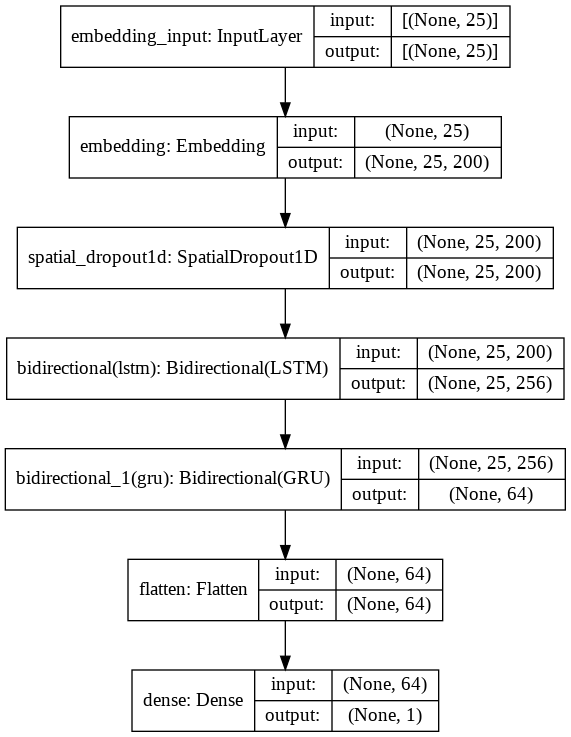

In [ ]:
model = Sequential()
model.add(Embedding(num_words, output_dim = 200, weights=[embedding_matrix], input_length= maxlen, trainable = True))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)))
model.add(Bidirectional(GRU(units = 32, dropout=0.2, recurrent_dropout=0.2)))
model.add(Flatten())
model.add(Dense(1, activation= 'sigmoid'))
tensorflow.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

### Compile the model (5 Marks)

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 200)           5650400   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 25, 200)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 256)           336896    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                55680     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 6,043,041
Trainable params: 6,043,041
Non-trainable params: 0
______________________________________________

### Fit the model (5 Marks)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X.shape

(26709, 25)

In [ ]:
#y = y.reshape(26709, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=1)

In [ ]:
model.fit(X_train, y_train, epochs = 6, batch_size=32, verbose = 2, validation_data=(X_test, y_test))

Epoch 1/6
626/626 - 199s - loss: 0.5480 - accuracy: 0.7160 - val_loss: 0.4331 - val_accuracy: 0.7940
Epoch 2/6
626/626 - 184s - loss: 0.4144 - accuracy: 0.8065 - val_loss: 0.3908 - val_accuracy: 0.8235
Epoch 3/6
626/626 - 183s - loss: 0.3406 - accuracy: 0.8485 - val_loss: 0.3777 - val_accuracy: 0.8332
Epoch 4/6
626/626 - 184s - loss: 0.2853 - accuracy: 0.8781 - val_loss: 0.3752 - val_accuracy: 0.8363
Epoch 5/6
626/626 - 186s - loss: 0.2413 - accuracy: 0.9004 - val_loss: 0.3932 - val_accuracy: 0.8381
Epoch 6/6
626/626 - 190s - loss: 0.2061 - accuracy: 0.9158 - val_loss: 0.4213 - val_accuracy: 0.8374


In [ ]:
model.evaluate(X_test, y_test, verbose = 1)

209/209 [==============================] - 6s 27ms/step - loss: 0.4213 - accuracy: 0.8374


[0.4212704002857208, 0.8373764753341675]

The test accuracy is between 82% and 84% which is good

In [ ]:
p = model.predict_classes(np.array(X_test), verbose=1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
209/209 [==============================] - 6s 29ms/step


In [ ]:
p[8]

array([1], dtype=int32)

In [ ]:
y_test[8]

1

In [ ]:
y_test[7]

1

In [ ]:
p[7]

array([0], dtype=int32)

We can see that for X_test[8] the prediction is correct i.e statement is a sarcasm but for X_test[7] record prediction is coming wrong

In [ ]:
from sklearn.metrics import *

In [ ]:
print(classification_report(y_test,model.predict_classes(np.array(X_test))))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3755
           1       0.84      0.77      0.80      2923

    accuracy                           0.84      6678
   macro avg       0.84      0.83      0.83      6678
weighted avg       0.84      0.84      0.83      6678



All the parameters are either 80% or nearby 80% which symbolizes a good model

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


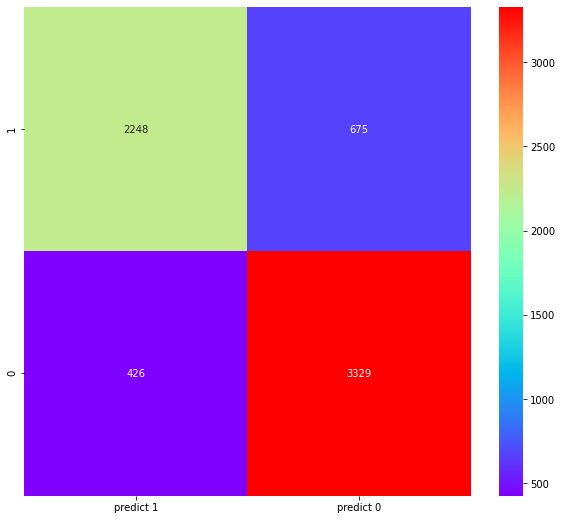

In [ ]:
c = confusion_matrix(y_test, model.predict_classes(np.array(X_test)), labels = [1,0])
conf_df = pd.DataFrame(c, index = [i for i in ["1","0"]], columns= ['predict 1', 'predict 0'])
plt.figure(figsize = (10,9))
sns.heatmap(conf_df, annot = True, fmt = 'g', cmap = 'rainbow')


In confusion matrix we see that True positive and true negative are highest in number